# Personalized Restaurant Recommendation System
This project leverages the power of Machine Learning (ML) and Natural Language Processing (NLP) technologies to revolutionize the restaurant recommendation experience. Main goal is to enhance the way individuals discover and choose accommodations that suit their preferences and needs. By employing Support Vector Machines (SVM), Random Forest (RF), Neural Networks (NN), and Naïve Bayes algorithms, we aim to analyze vast amounts of hotel-related data and provide tailored recommendations. 

## Import Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

## Uploading CSV
uploading csv, storing in dataframe and displaying first 5 entries of dataframe

In [45]:
df = pd.read_csv("TA_restaurants_curated.csv")
df

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170
...,...,...,...,...,...,...,...,...,...,...,...
125522,1662,Konrad Kaffee- & Cocktailbar,Zurich,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13273526-Reviews-K...,d13273526
125523,1663,Blueberry American Bakery,Zurich,['Cafe'],NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13292844-Reviews-B...,d13292844
125524,1664,Restaurant Bahnhof,Zurich,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13296092-Reviews-R...,d13296092
125525,1665,Yoyo Pizza,Zurich,['Fast Food'],NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188113-d13323362-Reviews-Y...,d13323362


## renaming and dropping
renaming and dropping columns.

In [46]:
df.drop(['URL_TA'], axis = 1, inplace = True)
df.drop(['ID_TA'], axis = 1, inplace = True)
df.drop(['Price Range'], axis = 1, inplace = True)
df.drop(['Name'], axis = 1, inplace = True)
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df

,City,Cuisine Style,Ranking,Rating,Number of Reviews,Reviews
0,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,136.0,"[['Just like home', 'A Warm Welcome to Wintry ..."
1,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,812.0,"[['Great food and staff', 'just perfect'], ['0..."
2,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,567.0,"[['Satisfaction', 'Delicious old school restau..."
3,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,564.0,"[['True five star dinner', 'A superb evening o..."
4,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,316.0,"[['Best meal.... EVER', 'super food experience..."
...,...,...,...,...,...,...
125522,Zurich,NaN,NaN,NaN,NaN,NaN
125523,Zurich,['Cafe'],NaN,NaN,NaN,NaN
125524,Zurich,NaN,NaN,NaN,NaN,NaN
125525,Zurich,['Fast Food'],NaN,NaN,NaN,NaN


## .shape
returns a tuple representing the dimensions (number of rows and columns) of a pandas DataFrame.

In [47]:
df.shape

(125527, 6)

## .info
provides a concise summary of information about a pandas DataFrame, including data types, non-null counts, and memory usage.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125527 entries, 0 to 125526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   City               125527 non-null  object 
 1   Cuisine Style      94176 non-null   object 
 2   Ranking            115876 non-null  float64
 3   Rating             115897 non-null  float64
 4   Number of Reviews  108183 non-null  float64
 5   Reviews            115911 non-null  object 
dtypes: float64(3), object(3)
memory usage: 5.7+ MB


## features types
assinging and displaying features types.

In [49]:
feature_types = {
    'City': 'Nominal Categorical',
    'Cusine Style': 'Nominal Categorical',
    'Ranking': 'Numerical',
    'Rating': 'Numerical',
    'Number of Reviews': 'Numerical',
    'Reviews': 'Nominal Categorical'
}

# Display feature types
for column in df.columns:
    if column in feature_types:
        print(f"{column}: {feature_types[column]}")
    else:
        print(f"{column}: Not specified")

City: Nominal Categorical
Cuisine Style: Not specified
Ranking: Numerical
Rating: Numerical
Number of Reviews: Numerical
Reviews: Nominal Categorical


## missing data analysis
calculates and returns the count of missing (null) values for each column in a DataFrame, allowing for easy identification of data gaps.

In [50]:
df.isnull().sum()

City                     0
Cuisine Style        31351
Ranking               9651
Rating                9630
Number of Reviews    17344
Reviews               9616
dtype: int64

## dupliacted data analysis
calculates and returns the count of missing (null) values for each column in a DataFrame , helping to assess the impact of data removal on missing data patterns.

In [51]:
df.duplicated().sum()

7337

## Handling Missing Data: Imputation using Mean
calculates the mean value of 'Number of Reviews' from a DataFrame (df) and fills missing values in the same column with this mean.

In [52]:
mean_value = df['Number of Reviews'].mean()
df['Number of Reviews'] = df['Number of Reviews'].fillna(mean_value)

## dropping NA values

In [53]:
df = df.dropna()

## dropping duplicate values

In [54]:
df = df.drop_duplicates()

## Cleaning and Parsing
performs data cleaning and parsing operations on the DataFrame (df). It removes rows where 'Reviews' contain 'nan', converts 'Reviews' and 'Cuisine Style' from string representation to lists, extracts review text and dates, and drops the original 'Reviews' column.

In [55]:
df = df[~df['Reviews'].str.contains('nan')]
df['Reviews'] = df['Reviews'].apply(ast.literal_eval)
df['Cuisine Style'] = df['Cuisine Style'].apply(ast.literal_eval)
df[['reviews_text', 'reviews_date']] = pd.DataFrame(df['Reviews'].tolist(), index=df.index)
df = df.drop(columns=['Reviews'])

In [56]:
df_visualization = df.copy()

## Visualizations
### Restaurant Distribution Across Cities

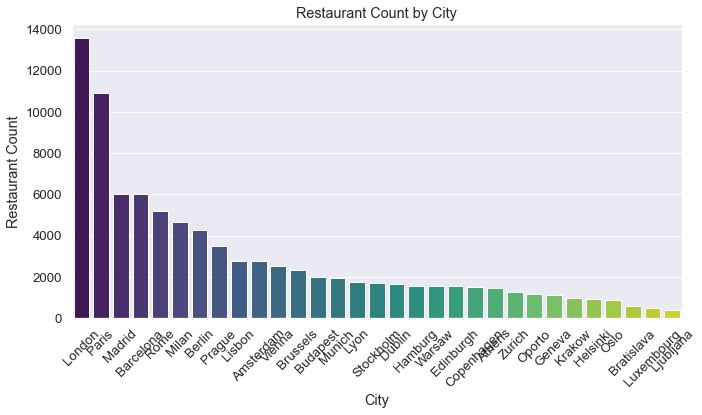

In [57]:
city_restaurant_count = df_visualization['City'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=city_restaurant_count.index, y=city_restaurant_count.values, palette='viridis')
plt.title('Restaurant Count by City')
plt.xlabel('City')
plt.ylabel('Restaurant Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Distribution of Top 5 Cuisines and Others

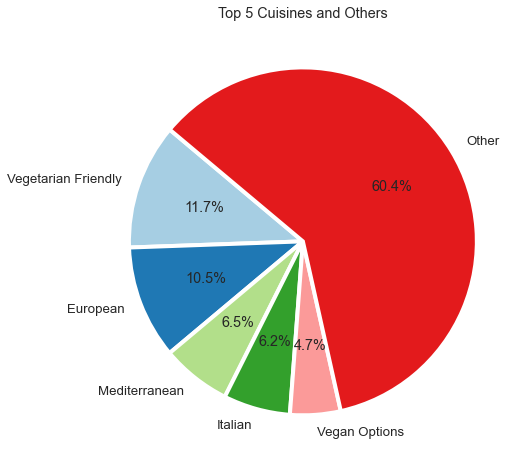

In [58]:
cuisine_list = []
for cuisines in df_visualization['Cuisine Style']:
    for cuisine in cuisines:
        cuisine_list.append(cuisine)
cuisine_counts = pd.Series(cuisine_list).value_counts()
top_cuisines = cuisine_counts.head(5)
other_cuisine_count = cuisine_counts[5:].sum()
top_cuisines['Other'] = other_cuisine_count
plt.figure(figsize=(8, 8))
top_cuisines.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors,wedgeprops={'linewidth':4.0,'edgecolor':'white'})
plt.title('Top 5 Cuisines and Others')
plt.ylabel('')
plt.show()

### Distribution of Restaurant Ratings

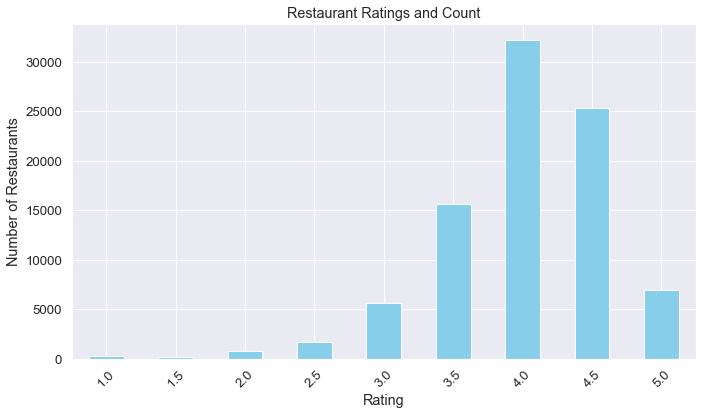

In [59]:
rating_counts = df_visualization['Rating'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Restaurant Ratings and Count')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### General review by city

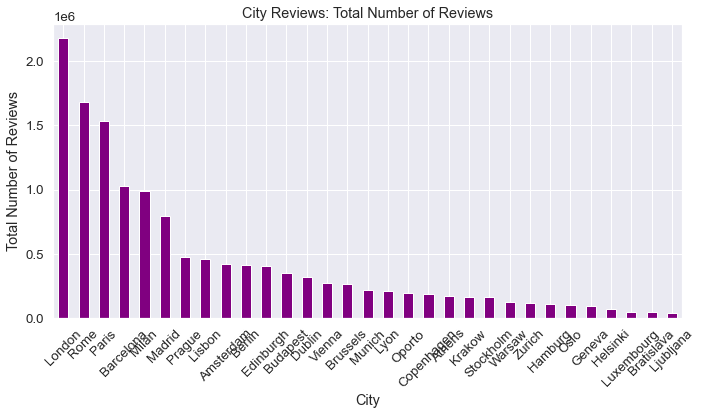

In [60]:
city_review_sum = df_visualization.groupby('City')['Number of Reviews'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
city_review_sum.plot(kind='bar', color='purple')
plt.title('City Reviews: Total Number of Reviews')
plt.xlabel('City')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlation Heatmap of Ranking, Rating, and Number of Reviews

<Axes: >

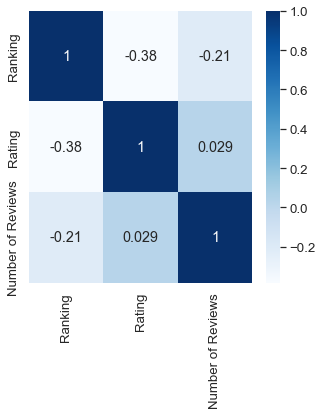

In [61]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.set(font_scale=1.2)
sns.heatmap(data=df_visualization[['Ranking', 'Rating','Number of Reviews']].corr(), cmap='Blues', annot=True)

### Word Cloud of Restaurant Reviews

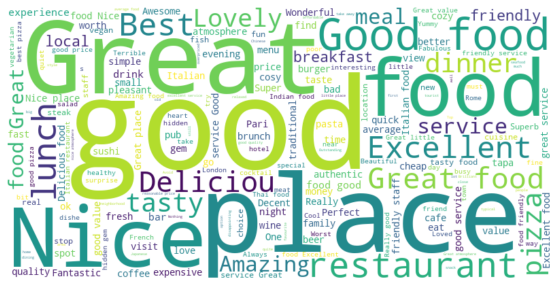

In [62]:
words = ''
for reviews in df_visualization['reviews_text']:
    words = words + (' ').join(reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Review Counts Over the Years

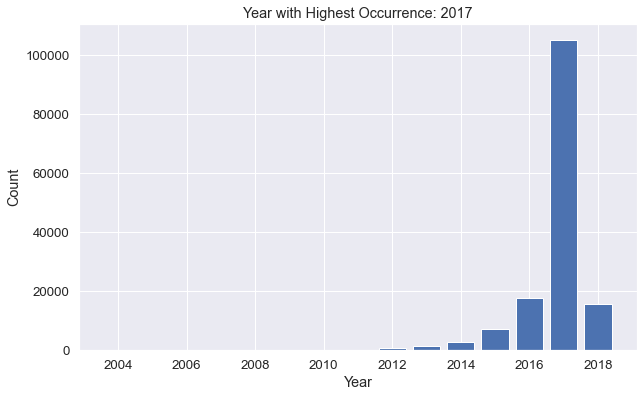

In [63]:
year_counts = {}
for date_list in df_visualization['reviews_date']:
    for date in date_list:
        year = pd.to_datetime(date).year
        if year in year_counts:
            year_counts[year] += 1
        else:
            year_counts[year] = 1
year_df = pd.DataFrame(year_counts.items(), columns=['Year', 'Count'])
max_occurrence_year = year_df.loc[year_df['Count'].idxmax()]['Year']
plt.figure(figsize=(10, 6))
plt.bar(year_df['Year'], year_df['Count'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title(f"Year with Highest Occurrence: {max_occurrence_year}")
plt.show()

### Correlation with Restaurant Ratings

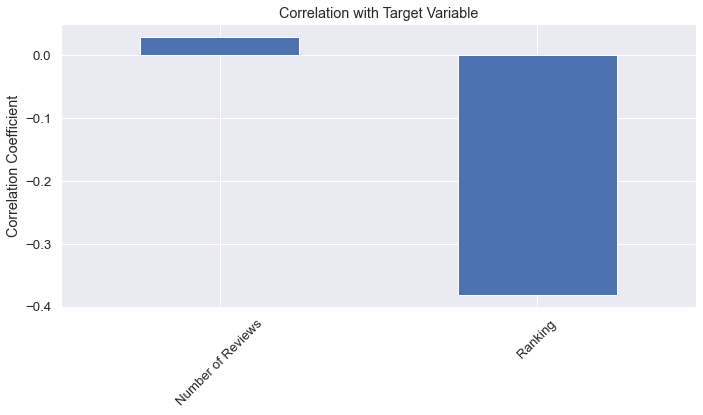

In [64]:
correlation_matrix = df_visualization.corr()
target_correlation = correlation_matrix['Rating'].drop('Rating')
target_correlation = target_correlation.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
target_correlation.plot(kind='bar')
plt.title('Correlation with Target Variable')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data Preprocessing
### One-Hot Encoding
one-hot encoding to the 'City' column in the DataFrame 

In [65]:
df_visualization = pd.get_dummies(df_visualization, columns=['City'], prefix=['City'])

### Recommendation Classification and Count
classifies ratings into recommendations (1 for ratings > 3) and non-recommendations (0 for ratings <= 3), and then counts the occurrences of each recommendation status, providing an insight into the distribution of recommendations based on the given ratings in the DataFrame

In [66]:
df_visualization['recommendation'] = df_visualization['Rating'].apply(lambda x: 1 if x > 3 else 0)
recommendation_counts = df_visualization['recommendation'].value_counts()
print(recommendation_counts)
count_0s = (df_visualization['recommendation'] == 0).sum()
count_1s = (df_visualization['recommendation'] == 1).sum()
min_count = min(count_0s, count_1s)
sampled_0s = df_visualization[df_visualization['recommendation'] == 0].sample(n=min_count)
sampled_1s = df_visualization[df_visualization['recommendation'] == 1].sample(n=min_count)
selected_rows = pd.concat([sampled_0s, sampled_1s])
selected_rows = selected_rows.sample(frac=1)
df_visualization = selected_rows.head(17000)
recommendation_counts = df_visualization['recommendation'].value_counts()
print(recommendation_counts)

1    80174
0     8754
Name: recommendation, dtype: int64
0    8502
1    8498
Name: recommendation, dtype: int64


###  One-Hot Encoding for Categorical Data
The apply_one_hot_encoding function is applied to the DataFrame for various categorical columns . The process involves the following steps:
1. Adding an 'ID' column to uniquely identify rows.
2. Splitting the specified column by commas and creating multiple rows for each value using explode.
3. Creating one-hot encoded columns for each unique value in the exploded column.
4. Grouping by 'ID' and selecting the maximum value to consolidate the one-hot encoded data.
5. Dropping the original categorical column and the 'ID' column to obtain the final one-hot encoded representation for the specified column.

In [25]:
df_visualization['Cuisine Style'] = df_visualization['Cuisine Style'].apply(lambda x: ', '.join(x))
df_visualization['ID'] = range(1, len(df_visualization) + 1)
df_visualization['Cuisine Style'] = df_visualization['Cuisine Style'].apply(lambda x: x.split(','))
df_long = df_visualization.explode('Cuisine Style')
df_visualization = pd.concat([df_visualization, pd.get_dummies(df_long['Cuisine Style'],prefix='Cuisine Style', prefix_sep='_')], axis=1)
df_visualization = df_visualization.groupby('ID').max().reset_index()
df_visualization = df_visualization.drop('Cuisine Style', axis=1)
df_visualization = df_visualization.drop('ID', axis=1)

In [26]:
df_visualization['reviews_text'] = df_visualization['reviews_text'].apply(lambda x: ' '.join(x))

### Text Data Preprocessing Functions
These functions, text_preprocessing, remove_stop_words, stemming, and lemmatization, serve various text data preprocessing purposes:
1. text_preprocessing: Tokenizes text, converts it to lowercase, and removes non-alphanumeric characters.
2. remove_stop_words: Removes common English stop words from the text.
3. stemming: Applies Porter stemming to reduce words to their root form.
4. lemmatization: Utilizes WordNet lemmatization to reduce words to their base or dictionary form.

In [27]:
def text_preprocessing(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words]
    words = [word for word in words if word.isalnum()]
    return ' '.join(words)

def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

def stemming(text):
    stemmer = PorterStemmer()
    words = word_tokenize(text)
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

In [28]:
df_visualization['reviews_text'] = df_visualization['reviews_text'].apply(text_preprocessing)
df_visualization['reviews_text'] = df_visualization['reviews_text'].apply(remove_stop_words)
df_visualization['reviews_text'] = df_visualization['reviews_text'].apply(stemming)
df_visualization['reviews_text'] = df_visualization['reviews_text'].apply(lemmatization)

### Text Data Vectorization and Integration
a CountVectorizer is used to convert text data from the column in the DataFrame into a numerical matrix title_matrix. The resulting matrix is then transformed into a DataFrame, with columns representing the unique words in the text. Finally, these word frequency features are concatenated with the original DataFrame before removing the previous column to create a consolidated dataset for further analysis.

In [29]:
count_vectorizer = CountVectorizer()
title_matrix = count_vectorizer.fit_transform(df_visualization['reviews_text'])
title_df = pd.DataFrame(title_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
df_visualization = pd.concat([df_visualization, title_df], axis=1)
df_visualization.drop(['reviews_date'], axis = 1, inplace = True)
df_visualization.drop(['reviews_text'], axis = 1, inplace = True)

### Feature Scaling for Model Enhancement
Min-Max scaling to normalize selected columns within the DataFrame.

In [30]:
columns_to_scale = ['Number of Reviews','Ranking']
scaler = MinMaxScaler()
df_visualization[columns_to_scale] = scaler.fit_transform(df_visualization[columns_to_scale])

## Model Preparing
### Feature-Target Split 

In [31]:
y =  df_visualization['recommendation']
X = df_visualization.drop(['recommendation'], axis=1)

###  Train-Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Testing
### Support Vector Machine (SVM) Classifier and Accuracy Visualization
A Support Vector Machine (SVM) classifier is trained and evaluated on the provided training and testing datasets (X_train, y_train, X_test, y_test). The classifier's accuracy on both the testing and training sets is calculated and displayed.

SVM  Testing Accuracy: 0.859375
SVM Training Accuracy: 0.8549019607843137


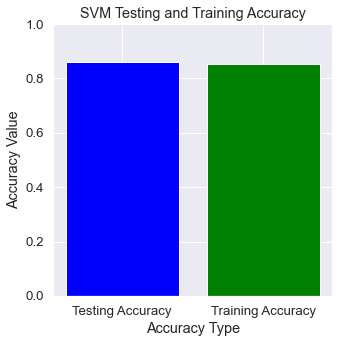

In [33]:
svm_classifier = SVC(C=0.03)
svm_classifier.fit(X_train, y_train)
svm_preds = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_train_preds = svm_classifier.predict(X_train)
svm_train_accuracy = accuracy_score(y_train, svm_train_preds)
print(f"SVM  Testing Accuracy: {svm_accuracy}")
print(f"SVM Training Accuracy: {svm_train_accuracy}")
categories = ['Testing Accuracy', 'Training Accuracy']
values = [svm_accuracy, svm_train_accuracy]
plt.bar(categories, values, color=['blue', 'green'])
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy Value')
plt.title('SVM Testing and Training Accuracy')
plt.ylim(0, 1)  # Set the y-axis limits appropriately
plt.show()

### Random Forest Classification and Accuracy Visualization
A Random Forest classifier to the training data, calculates both testing and training accuracies, and then displays the results. It also visualizes the accuracies using a bar chart, illustrating the performance of the Random Forest model on the dataset.

RF Testing Accuracy: 0.984375
RF Training Accuracy: 0.9901960784313726


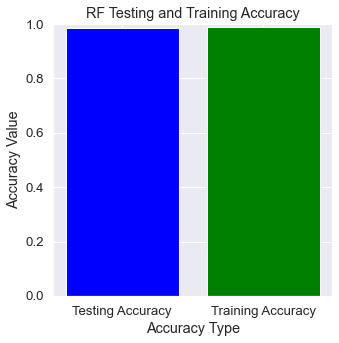

In [42]:
rf_classifier = RandomForestClassifier(n_estimators=100,max_depth=3)
rf_classifier.fit(X_train, y_train)
rf_preds = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_train_preds = rf_classifier.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_preds)
print(f"RF Testing Accuracy: {rf_accuracy}")
print(f"RF Training Accuracy: {rf_train_accuracy}")
categories = ['Testing Accuracy', 'Training Accuracy']
values = [rf_accuracy, rf_train_accuracy]
plt.bar(categories, values, color=['blue', 'green'])
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy Value')
plt.title('RF Testing and Training Accuracy')
plt.ylim(0, 1)  # Set the y-axis limits appropriately
plt.show()

### Naive Bayes Classification and Accuracy Visualization
A Multinomial Naive Bayes (NB) classifier with a specified alpha value is applied to the training data. It calculates and displays both testing and training accuracies for the NB model. The code also visualizes the accuracies using a bar chart, illustrating the performance of the NB model on the dataset.

NB  Testing Accuracy: 0.765625
NB Training Accuracy: 0.9176470588235294


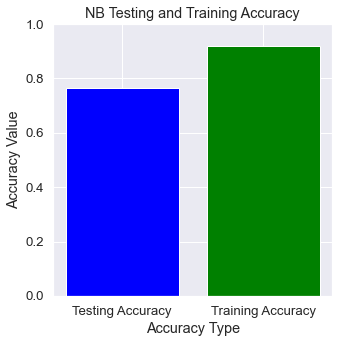

In [35]:
nb_classifier = MultinomialNB(alpha=1)
nb_classifier.fit(X_train, y_train)
nb_preds = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_preds)
nb_train_preds = nb_classifier.predict(X_train)
nb_train_accuracy = accuracy_score(y_train, nb_train_preds)
print(f"NB  Testing Accuracy: {nb_accuracy}")
print(f"NB Training Accuracy: {nb_train_accuracy}")
categories = ['Testing Accuracy', 'Training Accuracy']
values = [nb_accuracy, nb_train_accuracy]
plt.bar(categories, values, color=['blue', 'green'])
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy Value')
plt.title('NB Testing and Training Accuracy')
plt.ylim(0, 1)  # Set the y-axis limits appropriately
plt.show()

### Neural Network Classification and Accuracy Visualization
A Multi-Layer Perceptron (MLP) classifier with specific hidden layer sizes and alpha value is applied to the training data. It calculates and displays both testing and training accuracies for the MLP model. Additionally, the code visualizes the accuracies using a bar chart, illustrating the performance of the Neural Network model on the dataset.

NN  Testing Accuracy: 0.5
NN Training Accuracy: 0.5


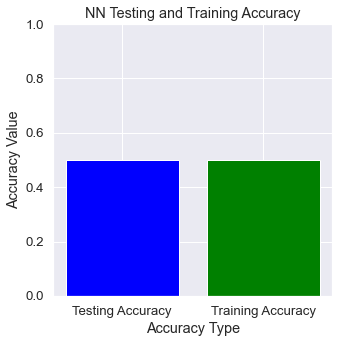

In [37]:
nn_classifier = MLPClassifier(hidden_layer_sizes=(64,32,16),alpha=100)
nn_classifier.fit(X_train, y_train)
nn_preds = nn_classifier.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_preds)
nn_train_preds = nn_classifier.predict(X_train)
nn_train_accuracy = accuracy_score(y_train, nn_train_preds)
print(f"NN  Testing Accuracy: {nn_accuracy}")
print(f"NN Training Accuracy: {nn_train_accuracy}")
categories = ['Testing Accuracy', 'Training Accuracy']
values = [nn_accuracy, nn_train_accuracy]
plt.bar(categories, values, color=['blue', 'green'])
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy Value')
plt.title('NN Testing and Training Accuracy')
plt.ylim(0, 1)  # Set the y-axis limits appropriately
plt.show()